### Visualization of the adaptivity of the sparse grid generation 

Adaptivity between 0.0 (very adaptive) and 1.0 (not adaptive)

In [69]:
import HPO
import pysgpp


BUDGET = 50
VERBOSE = 1

### Hyperparameter space definition

In [70]:
hyperparameterspace = {
    'epochs': ["interval-int", 1, 30],
    'optimizer__learning_rate': ["interval-log", 0.0000001, 0.01]
}

hyperparameterspace_special = {}
for key in hyperparameterspace.keys():
    liste = []
    for i in range(1, len(hyperparameterspace[key])):
        liste.append(hyperparameterspace[key][i])
    hyperparameterspace_special[key] = liste

### Definition of function to be minimized: 

f(budget, learning_rate) = 1 / (budget * learning_rate)

In [71]:
dataset = HPO.Dataset([], [])

class ExampleFunction(pysgpp.ScalarFunction):

    def __init__(self):
        super(ExampleFunction, self).__init__(len(hyperparameterspace.keys()))


    def eval(self, x):
        epochs = int(HPO.from_standard(hyperparameterspace_special["epochs"][0], hyperparameterspace_special["epochs"][1], x[0]))

        model_learning_rate = HPO.from_standard_log(hyperparameterspace_special["optimizer__learning_rate"][0], hyperparameterspace_special["optimizer__learning_rate"][1], x[1])
        
        return 1 / (epochs * model_learning_rate)


### Sparse Grid with Adaptivity 1.0

Initial level of sparse grid:  3
Initial level changed!
Adaptive grid generation (Ritter-Novak)...
Done in 2ms.


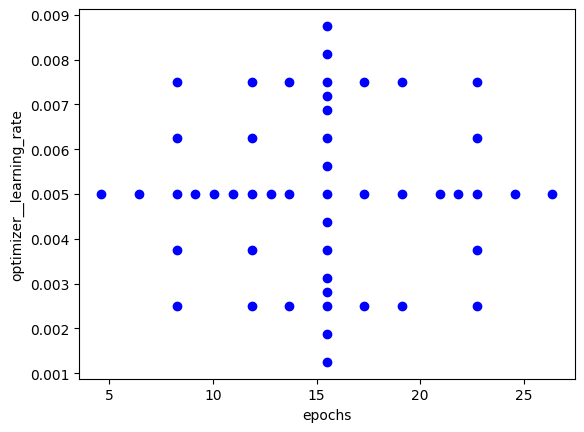

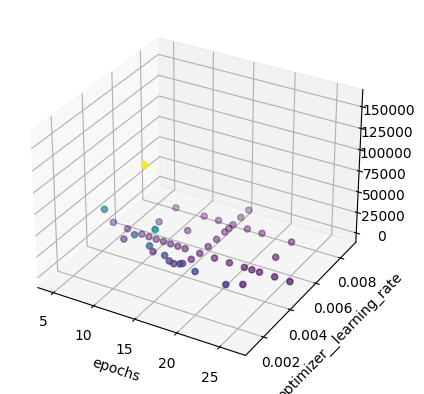

Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 15.5
optimizer__learning_rate: 0.002371373705661655
Resulting loss:
28.113100228578414
Optimizing (gradient descent)...

Optimal hyperparameters after optimization:
epochs: 29.999974289528996
optimizer__learning_rate: 0.002371373705661655
Resulting loss (Optimal value from optimization):
-1561.3184822303574
Resulting loss (Optimal point evaluated):
3.448311465777299
Done in 0ms.
Before optimization: 28.113100228572154
After optimization: 3.448311465777299


In [72]:
sparse_params=[3, 1, "gradient_descent"]

f = ExampleFunction()

optimization = HPO.SparseGridSearchOptimization(dataset, f, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, degree=sparse_params[0], adaptivity=sparse_params[1], optimizer=sparse_params[2])

result = optimization.fit()

result_not_optimized = f.eval(result[0])
result_optimized = f.eval(result[1])

print("Before optimization:", result_not_optimized)
print("After optimization:", result_optimized)

### Sparse Grid with Adaptivity 0.8

Initial level of sparse grid:  3
Initial level changed!
Adaptive grid generation (Ritter-Novak)...
Done in 1ms.


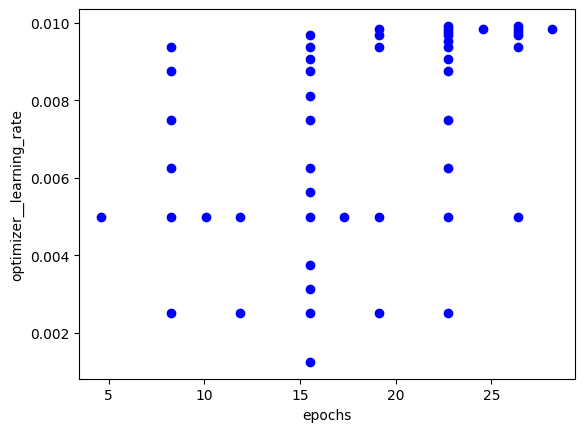

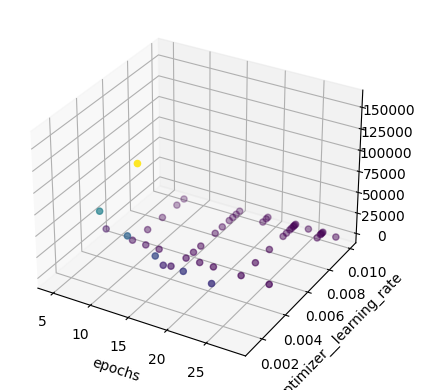

Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 26.375
optimizer__learning_rate: 0.009139816994654906
Resulting loss:
4.208130040714699
Optimizing (gradient descent)...

Optimal hyperparameters after optimization:
epochs: 29.999981529289663
optimizer__learning_rate: 0.009139816994654906
Resulting loss (Optimal value from optimization):
-0.3792276835259568
Resulting loss (Optimal point evaluated):
3.448298270114668
Done in 0ms.
Before optimization: 4.208130040681484
After optimization: 3.448298270114668


In [73]:
sparse_params=[3, 0.8, "gradient_descent"]

f = ExampleFunction()

optimization = HPO.SparseGridSearchOptimization(dataset, f, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, degree=sparse_params[0], adaptivity=sparse_params[1], optimizer=sparse_params[2])

result = optimization.fit()

result_not_optimized = f.eval(result[0])
result_optimized = f.eval(result[1])

print("Before optimization:", result_not_optimized)
print("After optimization:", result_optimized)

### Sparse Grid with Adaptivity 0.0


Initial level of sparse grid:  3
Initial level changed!
Adaptive grid generation (Ritter-Novak)...
Done in 2ms.


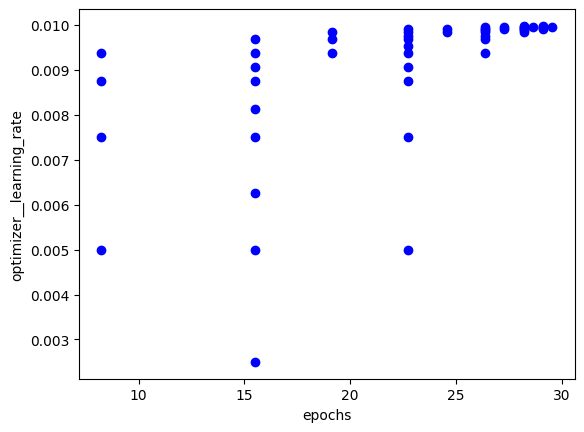

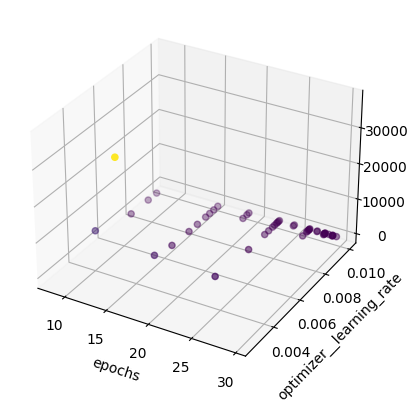

Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 29.09375
optimizer__learning_rate: 0.00977764747316709
Resulting loss:
3.5266927668722228
Optimizing (gradient descent)...

Optimal hyperparameters after optimization:
epochs: 29.20182913245894
optimizer__learning_rate: 0.00977764747316709
Resulting loss (Optimal value from optimization):
3.4339800204845425
Resulting loss (Optimal point evaluated):
3.448293317338105
Done in 0ms.
Before optimization: 3.5266927668768058
After optimization: 3.448293317338105


In [74]:
sparse_params=[3, 0.0, "gradient_descent"]

f = ExampleFunction()

optimization = HPO.SparseGridSearchOptimization(dataset, f, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, degree=sparse_params[0], adaptivity=sparse_params[1], optimizer=sparse_params[2])

result = optimization.fit()

result_not_optimized = f.eval(result[0])
result_optimized = f.eval(result[1])

print("Before optimization:", result_not_optimized)
print("After optimization:", result_optimized)